In [1]:
# Import the libraries
import numpy as np
import pandas as pd
from tensorflow import random

# Load the Data
X = pd.read_csv(".../aps_failure_training_feats.csv")
y = pd.read_csv(".../aps_failure_training_target.csv")

In [2]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=seed)

In [3]:
# Initialize StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Transform the training data
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X_test.columns)

# Transform the testing data
X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [4]:
# Import the relevant Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

random.set_seed(seed)
np.random.seed(seed)
model = Sequential()

# Add the hidden dense layers and with dropout Layer
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.5))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=4, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(rate=0.1))

# Add Output Dense Layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Fit the Model
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/100
1920/1920 [==============================] - 6s 3ms/step - loss: 0.1644 - accuracy: 0.9825 - val_loss: 0.0351 - val_accuracy: 0.9842
Epoch 2/100
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0406 - accuracy: 0.9840 - val_loss: 0.0318 - val_accuracy: 0.9842
Epoch 3/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0381 - accuracy: 0.9840 - val_loss: 0.0303 - val_accuracy: 0.9842
Epoch 4/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9840 - val_loss: 0.0313 - val_accuracy: 0.9842
Epoch 5/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0360 - accuracy: 0.9840 - val_loss: 0.0301 - val_accuracy: 0.9842
Epoch 6/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0324 - accuracy: 0.9840 - val_loss: 0.0302 - val_accuracy: 0.9842
Epoch 7/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0321 - accuracy: 0.9860 - val_loss: 0.0294 - val_ac

In [6]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

c:\users\vahidbabaey\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [7]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

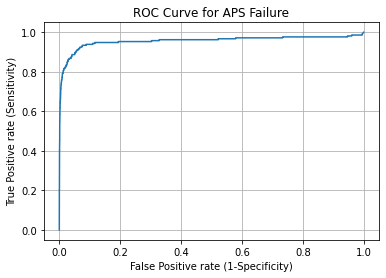

In [8]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.title("ROC Curve for APS Failure")
plt.xlabel("False Positive rate (1-Specificity)")
plt.ylabel("True Positive rate (Sensitivity)")
plt.grid(True)
plt.show()

In [9]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.9561684492064203